## Basico de tensorFlow ##

Referencias:
https://blog.altoros.com/using-linear-regression-in-tensorflow.html  
https://www.youtube.com/watch?v=yX8KuPZCAMo

In [620]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [8]:
a = tf.constant(5.0)

In [9]:
b = tf.constant(6.0)

In [10]:
c = a * b 

In [11]:
sess = tf.Session()

In [15]:
sess.run(c)

In [21]:
File_writer = tf.summary.FileWriter('/Users/roger/tensor/graph', sess.graph)

utilizar o shell ate a pasta salva e utilizar o comando tensorboard --logdir="tensor" para iniciar o tensor board

## Placeholder ##

In [45]:
a = tf.placeholder(tf.float32)

In [46]:
b = tf.placeholder(tf.float32)

In [47]:
adder_node = a+b

In [48]:
sess = tf.Session()

In [49]:
print(sess.run(adder_node,feed_dict={a:[1,3],b:[2,4]}))

[ 3.  7.]


## Linear model ##

In [704]:
W = tf.Variable(numpy.random.randn(), name="weight")
b = tf.Variable(numpy.random.randn(), name="bias")

In [705]:
#inputs
x = tf.placeholder("float")
y  = tf.add(tf.multiply(x, W), b) 
y_ = tf.placeholder("float")

In [706]:
# cost_function
squared_delta = tf.square(y - y_)
cost_function = tf.reduce_sum(squared_delta)

In [707]:
# training_step
learning_rate = 0.01
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

In [708]:
init = tf.global_variables_initializer()

In [709]:
sess = tf.Session()

In [710]:
sess.run(init)

## Funcao para normalizar dados ##

In [711]:
def normalize(array):
    return (array - array.mean()) / array.std()

Dados de exemplo, explicar atraves de uma regressao linear se existe relacao do tamanho da casa com o preco

In [712]:
tamanho_casa = np.asarray([ 2104,  1600,  2400,  1416,  3000,  1985,  1534,  1427,
  1380,  1494,  1940,  2000,  1890,  4478,  1268,  2300,
  1320,  1236,  2609,  3031,  1767,  1888,  1604,  1962,
  3890,  1100,  1458,  2526,  2200,  2637,  1839,  1000,
  2040,  3137,  1811,  1437,  1239,  2132,  4215,  2162,
  1664,  2238,  2567,  1200,   852,  1852,  1203])
preco = np.asarray([399900,  329900,  369000,  232000,  539900,  299900,  314900,  198999,
  212000,  242500,  239999,  347000,  329999,  699900,  259900,  449900,
  299900,  199900,  499998,  599000,  252900,  255000,  242900,  259900,
  573900,  249900,  464500,  469000,  475000,  299900,  349900,  169900,
  314900,  579900,  285900,  249900,  229900,  345000,  549000,  287000,
  368500,  329900,  314000,  299000,  179900,  299900,  239500])


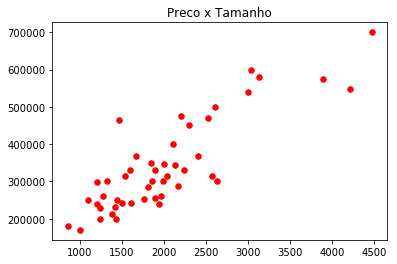

In [713]:
plt.scatter(x=tamanho_casa,y=preco,s=30,color='r')
plt.title('Preco x Tamanho')
plt.show()

**Normalizando dados**

In [714]:
tamanho_casa_n =  preprocessing.scale(tamanho_casa)
preco_n = preprocessing.scale(preco)

In [715]:
X = tamanho_casa_n
Y = preco_n

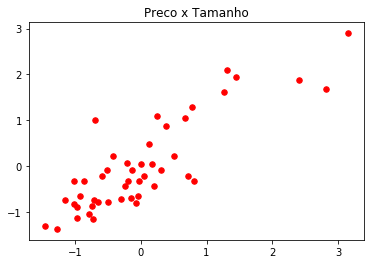

In [716]:
plt.scatter(x=X,y=Y,s=30,color='r')
plt.title('Preco x Tamanho')
plt.show()

In [717]:
# shuffle the dataset
X, Y  = shuffle(X , Y , random_state =1)

In [718]:
train_x, test_x , train_y, test_y = train_test_split(X,Y,test_size=0.2,random_state=415)

In [719]:
test_y


array([ 0.22705549,  1.03948831,  1.88749033, -0.81173485, -0.21351753,
       -0.70744435,  0.88508566,  0.05325146, -0.33477616, -0.69046814])

In [720]:
epoch = 20
cost_history = np.empty(shape=[1], dtype = float)
mse_history = []
display_step = 5

In [721]:
for iteration in range(epoch):
    sess.run(training_step, feed_dict={x:train_x,y_:train_y})
    
    
    if iteration % display_step == 0:
        print "Iteration:", '%04d' % (iteration + 1), "cost=", "{:.9f}".format(sess.run(cost_function, feed_dict={x:train_x, y_:train_y})),"W=", sess.run(W), "b=", sess.run(b)
    
    #cost = sess.run(cost_function, feed_dict={x:train_x,y_:train_y})
    #cost_history = np.append(cost_history,cost)
    #correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
    #accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    
    pred_y = sess.run(y,  feed_dict={x:test_x})
    
    #mse =  tf.reduce_sum(tf.square(pred_y - test_y))
    #mse_ = sess.run(mse)
   
    #accur = (sess.run(accuracy, feed_dict={x:train_x,y_:train_y}))
    #accuracy_history.append(accur)    
    #print('epoch:',i,' ',mse_)    

Iteration: 0001 cost= 22.673526764 W= 0.678729 b= -0.55184
Iteration: 0006 cost= 9.632670403 W= 0.881065 b= 0.0155139
Iteration: 0011 cost= 9.632619858 W= 0.881697 b= 0.0165257
Iteration: 0016 cost= 9.632619858 W= 0.881699 b= 0.0165277


In [722]:
#medidas
total_error = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))
unexplained_error = tf.reduce_sum(tf.square(tf.subtract(y, pred_y)))
R_squared = tf.subtract(1.0, tf.divide(unexplained_error, total_error))
MAPE = tf.reduce_mean(tf.abs(tf.div(tf.subtract(y, pred_y), y)))
RMSE = tf.sqrt(tf.reduce_mean(tf.square(tf.subtract(y, pred_y))))
sess.run(R_squared,feed_dict={y:test_y})

0.5692935

In [723]:
print "Model paramters:"       
print "Weight:%f" %sess.run(W)
print "bias:%f" %sess.run(b)

Model paramters:
Weight:0.881699
bias:0.016528


** Teste **

In [724]:
preco_ = tf.add(tf.multiply(test_x, sess.run(W)), sess.run(b)) 

In [725]:
y_ = sess.run(preco_)

In [726]:
y_

array([-0.36104804,  0.60565473,  2.1353329 , -0.05152372,  0.65163479,
       -0.24553715,  0.35220366,  0.01576418, -0.88140777, -0.1098399 ])

In [727]:
test_y

array([ 0.22705549,  1.03948831,  1.88749033, -0.81173485, -0.21351753,
       -0.70744435,  0.88508566,  0.05325146, -0.33477616, -0.69046814])

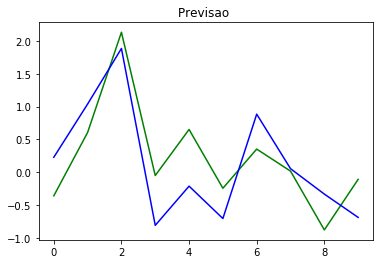

In [728]:
plt.plot(y_,color='g')
plt.plot(test_y,color='b')
plt.title('Previsao ')
plt.show()

In [379]:
sess.close()